# Big Data Analytics (BDA)
## GSLC Session 5 & 6

Pristian Budi Dharmawan - 2501983105 - LB20

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### EDA

In [2]:
header = ['department', 'status', 'age', 'salary', 'count']
dataset = pd.read_csv('GSLC_Session_5_Manual Standardization.csv')

dataset.columns = header

In [3]:
dataset.head()

,department,status,age,salary,count
0,0,0,2,4,30
1,0,1,1,0,40
2,0,1,2,1,40
3,1,1,0,4,20
4,1,0,2,5,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   department  11 non-null     int64
 1   status      11 non-null     int64
 2   age         11 non-null     int64
 3   salary      11 non-null     int64
 4   count       11 non-null     int64
dtypes: int64(5)
memory usage: 568.0 bytes


### Due to increasing the accuracy of the model, we will try with another approach in other file

#### Department
- 0 = sales
- 1 = systems
- 2 = marketing
- 3 = secretary

#### Status
- 0 = senior
- 1 = junior

#### Age
- 0 = 21 - 25
- 1 = 26 - 30
- 2 = 31 - 35
- 3 = 36 - 40
- 4 = 41 - 45
- 5 = 46 - 50

#### Salary
- 0 = 26 - 30
- 1 = 31 - 35
- 2 = 36 - 40
- 3 = 41 - 45
- 4 = 46 - 50
- 5 = 66 - 70

Split the dataset into separate training and test set by 30% Test Size, and 70% Training Size

In [5]:
feature = ['department', 'status', 'age', 'salary']
X = dataset[feature]
y = dataset['count']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
X_train.head(5), X_test.head(5)

(    department  status  age  salary
 1            0       1    1       0
 6            1       0    4       5
 0            0       0    2       4
 7            2       0    3       4
 10           3       1    1       0,
    department  status  age  salary
 2           0       1    2       1
 3           1       1    0       4
 4           1       0    2       5
 9           3       0    5       2)

### Classify the Decision Tree using Gini Impurity

In [8]:
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Put it inside the model
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
# Predict the Test Result with Gini Impurity
y_pred_gini = gini.predict(X_test)

Check for the model accuracy

In [10]:
# Model Accuracy, how often is the classifier correct?
print('Model accuracy score with criterion gini impurity: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini impurity: 0.5000


Overfitting and underfitting checking & Comparing the test set score and training set score

In [11]:
print('Training set score: {:.4f}'.format(gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.5000


### Visualize!

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

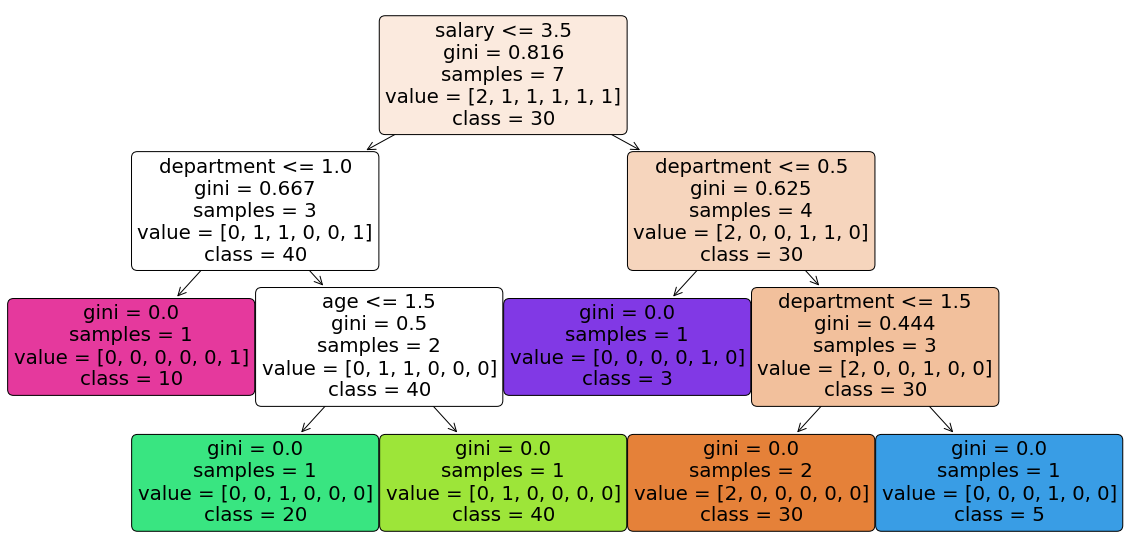

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(gini, feature_names=X_train.columns.tolist(), class_names=[str(i) for i in y.unique()], filled=True, rounded=True)
plt.show()

### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test, y_pred_gini)
cm

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

### Classification Report

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          40       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.40      0.40      0.40         4
weighted avg       0.50      0.50      0.50         4



C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMet

# Conclusion

Based on another approach by standardizing the categorical value into a numerical value, the accuracy remains the same, which are 0.5 for the test dataset and 1 for the training dataset. However, we must admit that the maximum depth of gini impurity also plays a vital role in increasing the model's accuracy.

The main factor that affects my Decision Tree Model is:
- Max Depth of the tree; The maximum depth that I use is 3